In [1]:
import pandas as pd
import numpy as np 
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
credit1=pd.read_csv('export_credit1.csv')

In [3]:
credit1.head()

Unnamed: 0  Unnamed: 0.1  ID  CREDITLIMIT     SEX   EDUCATION  \
0           0             0   1        20000  female  university   
1           1             1   2       120000  female  university   
2           2             2   3        90000  female  university   
3           3             3   4        50000  female  university   
4           4             4   5        50000    male  university   

   MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  ...  JUNSTMT  MAYSTMT  \
0               1   24             2             2  ...        0        0   
1               2   26            -1             2  ...     3272     3455   
2               2   34             0             0  ...    14331    14948   
3               1   37             0             0  ...    28314    28959   
4               1   57            -1             0  ...    20940    19146   

   APRSTMT  SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0             0           689             0             0   
1     3261             0          1000          1000          1000   
2    15549          1518          1500          1000          1000   
3    29547          2000          2019          1200          1100   
4    19131          2000         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default payment next month  
0             0             0                     default  
1             0          2000                     default  
2          1000          5000                 not default  
3          1069          1000                 not default  
4           689           679                 not default  

[5 rows x 27 columns]

In [4]:
credit1.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
ID                             int64
CREDITLIMIT                    int64
SEX                           object
EDUCATION                     object
MARRIAGESTATUS                 int64
AGE                            int64
APRPAYSTATUS                   int64
MAYPAYSTATUS                   int64
JUNPAYSTATUS                   int64
JULPAYSTATUS                   int64
AUGPAYSTATUS                   int64
SEPPAYSTATUS                   int64
SEPSTMT                        int64
AUGSTMT                        int64
JULSTMT                        int64
JUNSTMT                        int64
MAYSTMT                        int64
APRSTMT                        int64
SEPPREVPYMNT                   int64
AUGPREVPYMNT                   int64
JULPREVPYMNT                   int64
JUNPREVPYMNT                   int64
MAYPREVPYMNT                   int64
APRPREVPYMNT                   int64
default payment next month    object
d

In [5]:
credit1['default']=credit1['default payment next month']
credit1=credit1.drop(['ID','Unnamed: 0','Unnamed: 0.1','default payment next month'], axis=1)

In [6]:
credit1.head()

CREDITLIMIT     SEX   EDUCATION  MARRIAGESTATUS  AGE  APRPAYSTATUS  \
0        20000  female  university               1   24             2   
1       120000  female  university               2   26            -1   
2        90000  female  university               2   34             0   
3        50000  female  university               1   37             0   
4        50000    male  university               1   57            -1   

   MAYPAYSTATUS  JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  ...  JUNSTMT  \
0             2            -1            -1            -2  ...        0   
1             2             0             0             0  ...     3272   
2             0             0             0             0  ...    14331   
3             0             0             0             0  ...    28314   
4             0            -1             0             0  ...    20940   

   MAYSTMT  APRSTMT  SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0        0             0           689             0             0   
1     3455     3261             0          1000          1000          1000   
2    14948    15549          1518          1500          1000          1000   
3    28959    29547          2000          2019          1200          1100   
4    19146    19131          2000         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT      default  
0             0             0      default  
1             0          2000      default  
2          1000          5000  not default  
3          1069          1000  not default  
4           689           679  not default  

[5 rows x 24 columns]

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
le = preprocessing.LabelEncoder()
le.fit(credit1['SEX'])
credit1['SEX']=le.transform(credit1['SEX'])

In [9]:
le = preprocessing.LabelEncoder()
le.fit(credit1['default'])
credit1['default']=le.transform(credit1['default'])

In [10]:
credit1.head()

CREDITLIMIT  SEX   EDUCATION  MARRIAGESTATUS  AGE  APRPAYSTATUS  \
0        20000    0  university               1   24             2   
1       120000    0  university               2   26            -1   
2        90000    0  university               2   34             0   
3        50000    0  university               1   37             0   
4        50000    1  university               1   57            -1   

   MAYPAYSTATUS  JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  ...  JUNSTMT  \
0             2            -1            -1            -2  ...        0   
1             2             0             0             0  ...     3272   
2             0             0             0             0  ...    14331   
3             0             0             0             0  ...    28314   
4             0            -1             0             0  ...    20940   

   MAYSTMT  APRSTMT  SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0        0             0           689             0             0   
1     3455     3261             0          1000          1000          1000   
2    14948    15549          1518          1500          1000          1000   
3    28959    29547          2000          2019          1200          1100   
4    19146    19131          2000         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default  
0             0             0        0  
1             0          2000        0  
2          1000          5000        1  
3          1069          1000        1  
4           689           679        1  

[5 rows x 24 columns]

In [11]:
credit1.dtypes

CREDITLIMIT        int64
SEX                int32
EDUCATION         object
MARRIAGESTATUS     int64
AGE                int64
APRPAYSTATUS       int64
MAYPAYSTATUS       int64
JUNPAYSTATUS       int64
JULPAYSTATUS       int64
AUGPAYSTATUS       int64
SEPPAYSTATUS       int64
SEPSTMT            int64
AUGSTMT            int64
JULSTMT            int64
JUNSTMT            int64
MAYSTMT            int64
APRSTMT            int64
SEPPREVPYMNT       int64
AUGPREVPYMNT       int64
JULPREVPYMNT       int64
JUNPREVPYMNT       int64
MAYPREVPYMNT       int64
APRPREVPYMNT       int64
default            int32
dtype: object

In [12]:
credit1=pd.get_dummies(credit1)

In [13]:
credit1.dtypes

CREDITLIMIT                  int64
SEX                          int32
MARRIAGESTATUS               int64
AGE                          int64
APRPAYSTATUS                 int64
MAYPAYSTATUS                 int64
JUNPAYSTATUS                 int64
JULPAYSTATUS                 int64
AUGPAYSTATUS                 int64
SEPPAYSTATUS                 int64
SEPSTMT                      int64
AUGSTMT                      int64
JULSTMT                      int64
JUNSTMT                      int64
MAYSTMT                      int64
APRSTMT                      int64
SEPPREVPYMNT                 int64
AUGPREVPYMNT                 int64
JULPREVPYMNT                 int64
JUNPREVPYMNT                 int64
MAYPREVPYMNT                 int64
APRPREVPYMNT                 int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [14]:
#changing credit1 to credit 
credit=credit1

In [15]:
credit['APRPAYSTATUS']=credit['APRPAYSTATUS'].replace(-2,0)
credit['MAYPAYSTATUS']=credit['MAYPAYSTATUS'].replace(-2,0)
credit['JUNPAYSTATUS']=credit['JUNPAYSTATUS'].replace(-2,0)
credit['JULPAYSTATUS']=credit['JULPAYSTATUS'].replace(-2,0)
credit['AUGPAYSTATUS']=credit['AUGPAYSTATUS'].replace(-2,0)
credit['SEPPAYSTATUS']=credit['SEPPAYSTATUS'].replace(-2,0)


credit['APRPAYSTATUS']=credit['APRPAYSTATUS'].replace(-1,0)
credit['MAYPAYSTATUS']=credit['MAYPAYSTATUS'].replace(-1,0)
credit['JUNPAYSTATUS']=credit['JUNPAYSTATUS'].replace(-1,0)
credit['JULPAYSTATUS']=credit['JULPAYSTATUS'].replace(-1,0)
credit['AUGPAYSTATUS']=credit['AUGPAYSTATUS'].replace(-1,0)
credit['SEPPAYSTATUS']=credit['SEPPAYSTATUS'].replace(-1,0)

In [16]:
#try to bin my credit limit
pd.qcut(credit['CREDITLIMIT'],q=5, labels=False)

0        0
1        2
2        1
3        0
4        0
        ..
29995    3
29996    2
29997    0
29998    1
29999    0
Name: CREDITLIMIT, Length: 30000, dtype: int64

In [17]:
credit['CREDLIM_CAT']=pd.qcut(credit['CREDITLIMIT'],q=5, labels=False)

In [18]:
credit.dtypes

CREDITLIMIT                  int64
SEX                          int32
MARRIAGESTATUS               int64
AGE                          int64
APRPAYSTATUS                 int64
MAYPAYSTATUS                 int64
JUNPAYSTATUS                 int64
JULPAYSTATUS                 int64
AUGPAYSTATUS                 int64
SEPPAYSTATUS                 int64
SEPSTMT                      int64
AUGSTMT                      int64
JULSTMT                      int64
JUNSTMT                      int64
MAYSTMT                      int64
APRSTMT                      int64
SEPPREVPYMNT                 int64
AUGPREVPYMNT                 int64
JULPREVPYMNT                 int64
JUNPREVPYMNT                 int64
MAYPREVPYMNT                 int64
APRPREVPYMNT                 int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
CREDLIM_CAT                  int64
dtype: object

In [19]:
print(credit.groupby(['CREDLIM_CAT'])['CREDLIM_CAT'].count())

CREDLIM_CAT
0    7676
1    4822
2    6123
3    5421
4    5958
Name: CREDLIM_CAT, dtype: int64


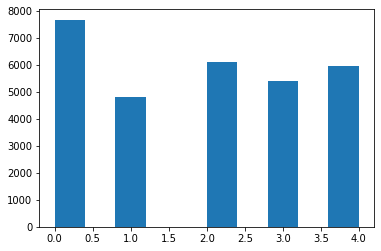

In [20]:
plt.hist(credit['CREDLIM_CAT'])
plt.show()

In [21]:
print(credit.groupby(['CREDLIM_CAT'])['CREDLIM_CAT'].sum())

CREDLIM_CAT
0        0
1     4822
2    12246
3    16263
4    23832
Name: CREDLIM_CAT, dtype: int64


In [22]:
import seaborn as sns

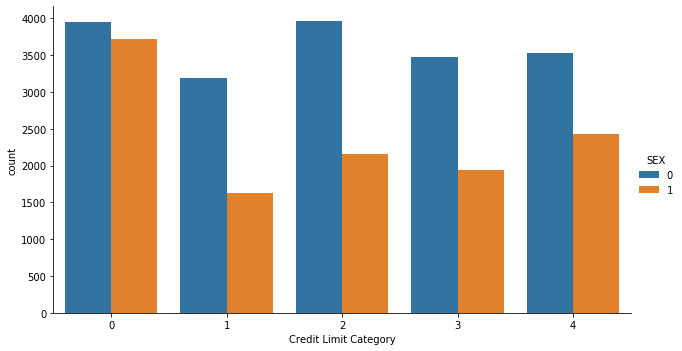

In [23]:
#females outnumber the males in each category
g = sns.catplot('CREDLIM_CAT', data=credit1, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Credit Limit Category')

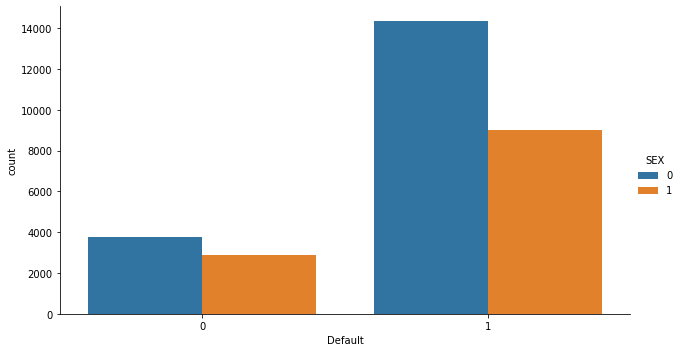

In [24]:
#lets try to plot by sex and default
g = sns.catplot('default', data=credit1, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [25]:
credit.head()

CREDITLIMIT  SEX  MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  \
0        20000    0               1   24             2             2   
1       120000    0               2   26             0             2   
2        90000    0               2   34             0             0   
3        50000    0               1   37             0             0   
4        50000    1               1   57             0             0   

   JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  SEPPAYSTATUS  ...  JULPREVPYMNT  \
0             0             0             0             0  ...             0   
1             0             0             0             2  ...          1000   
2             0             0             0             0  ...          1000   
3             0             0             0             0  ...          1200   
4             0             0             0             0  ...         10000   

   JUNPREVPYMNT  MAYPREVPYMNT  APRPREVPYMNT  default  \
0             0             0             0        0   
1          1000             0          2000        0   
2          1000          1000          5000        1   
3          1100          1069          1000        1   
4          9000           689           679        1   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_other  \
0                          0                      0                0   
1                          0                      0                0   
2                          0                      0                0   
3                          0                      0                0   
4                          0                      0                0   

   EDUCATION_university  CREDLIM_CAT  
0                     1            0  
1                     1            2  
2                     1            1  
3                     1            0  
4                     1            0  

[5 rows x 28 columns]

In [26]:
credit=credit.drop(['MARRIAGESTATUS','SEX','APRPAYSTATUS','MAYPAYSTATUS','JUNPAYSTATUS','JULPAYSTATUS','AUGPAYSTATUS','SEPPAYSTATUS'], axis=1)

In [27]:
credit.head()

CREDITLIMIT  AGE  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  \
0        20000   24     3913     3102      689        0        0        0   
1       120000   26     2682     1725     2682     3272     3455     3261   
2        90000   34    29239    14027    13559    14331    14948    15549   
3        50000   37    46990    48233    49291    28314    28959    29547   
4        50000   57     8617     5670    35835    20940    19146    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  default  EDUCATION_graduate school  EDUCATION_high school  \
0             0        0                          0                      0   
1          2000        0                          0                      0   
2          5000        1                          0                      0   
3          1000        1                          0                      0   
4           679        1                          0                      0   

   EDUCATION_other  EDUCATION_university  CREDLIM_CAT  
0                0                     1            0  
1                0                     1            2  
2                0                     1            1  
3                0                     1            0  
4                0                     1            0

In [28]:
credit=credit.drop(['EDUCATION_high school','EDUCATION_other','EDUCATION_university'], axis=1)

In [29]:
credit.head()

CREDITLIMIT  AGE  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  \
0        20000   24     3913     3102      689        0        0        0   
1       120000   26     2682     1725     2682     3272     3455     3261   
2        90000   34    29239    14027    13559    14331    14948    15549   
3        50000   37    46990    48233    49291    28314    28959    29547   
4        50000   57     8617     5670    35835    20940    19146    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  default  EDUCATION_graduate school  CREDLIM_CAT  
0             0        0                          0            0  
1          2000        0                          0            2  
2          5000        1                          0            1  
3          1000        1                          0            0  
4           679        1                          0            0

In [30]:
pd.qcut(credit['AGE'],q=5, labels=False)

0        0
1        0
2        2
3        2
4        4
        ..
29995    3
29996    3
29997    2
29998    3
29999    4
Name: AGE, Length: 30000, dtype: int64

In [31]:
credit['AGE_CAT']=pd.qcut(credit['AGE'],q=5, labels=False)

In [32]:
credit.head()

CREDITLIMIT  AGE  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  \
0        20000   24     3913     3102      689        0        0        0   
1       120000   26     2682     1725     2682     3272     3455     3261   
2        90000   34    29239    14027    13559    14331    14948    15549   
3        50000   37    46990    48233    49291    28314    28959    29547   
4        50000   57     8617     5670    35835    20940    19146    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  default  EDUCATION_graduate school  CREDLIM_CAT  AGE_CAT  
0             0        0                          0            0        0  
1          2000        0                          0            2        0  
2          5000        1                          0            1        2  
3          1000        1                          0            0        2  
4           679        1                          0            0        4

In [33]:
credit=credit.drop(['CREDITLIMIT','AGE'],axis=1)

In [34]:
credit.head()

SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  SEPPREVPYMNT  \
0     3913     3102      689        0        0        0             0   
1     2682     1725     2682     3272     3455     3261             0   
2    29239    14027    13559    14331    14948    15549          1518   
3    46990    48233    49291    28314    28959    29547          2000   
4     8617     5670    35835    20940    19146    19131          2000   

   AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  APRPREVPYMNT  \
0           689             0             0             0             0   
1          1000          1000          1000             0          2000   
2          1500          1000          1000          1000          5000   
3          2019          1200          1100          1069          1000   
4         36681         10000          9000           689           679   

   default  EDUCATION_graduate school  CREDLIM_CAT  AGE_CAT  
0        0                          0            0        0  
1        0                          0            2        0  
2        1                          0            1        2  
3        1                          0            0        2  
4        1                          0            0        4

In [35]:
credit=credit[['AGE_CAT','SEPSTMT','AUGSTMT','JULSTMT','JUNSTMT','MAYSTMT','APRSTMT','SEPPREVPYMNT','AUGPREVPYMNT','JULPREVPYMNT','JUNPREVPYMNT','MAYPREVPYMNT','APRPREVPYMNT','EDUCATION_graduate school','CREDLIM_CAT','default']]

In [36]:
credit.head()

AGE_CAT  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  \
0        0     3913     3102      689        0        0        0   
1        0     2682     1725     2682     3272     3455     3261   
2        2    29239    14027    13559    14331    14948    15549   
3        2    46990    48233    49291    28314    28959    29547   
4        4     8617     5670    35835    20940    19146    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  EDUCATION_graduate school  CREDLIM_CAT  default  
0             0                          0            0        0  
1          2000                          0            2        0  
2          5000                          0            1        1  
3          1000                          0            0        1  
4           679                          0            0        1

TIME TO MAKE MY MODEL

In [37]:
X = credit.iloc[:,0:15]
print('Summary of feature sample')
X.head()

Summary of feature sample


AGE_CAT  SEPSTMT  AUGSTMT  JULSTMT  JUNSTMT  MAYSTMT  APRSTMT  \
0        0     3913     3102      689        0        0        0   
1        0     2682     1725     2682     3272     3455     3261   
2        2    29239    14027    13559    14331    14948    15549   
3        2    46990    48233    49291    28314    28959    29547   
4        4     8617     5670    35835    20940    19146    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  EDUCATION_graduate school  CREDLIM_CAT  
0             0                          0            0  
1          2000                          0            2  
2          5000                          0            1  
3          1000                          0            0  
4           679                          0            0

In [38]:
y=credit['default']

In [39]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [40]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warni

In [41]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.00366685168964657
Linear Regression 0.030382825877208197
Support Vector Regression -0.01913728202244965


In [43]:
algoL=LinearRegression()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [47]:
modelL = algoL.fit(X_train,y_train)

In [48]:
predsL = algoL.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
from math import sqrt

In [52]:
rmse = sqrt(mean_squared_error(y_test, predsL))

In [53]:
predRsquared = r2_score(y_test,predsL)

In [56]:
print(cross_val_score(algoL, X, y, cv=3)) 

[0.02079798 0.03992543 0.03042507]


ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 9000, 'y' with size 9000.

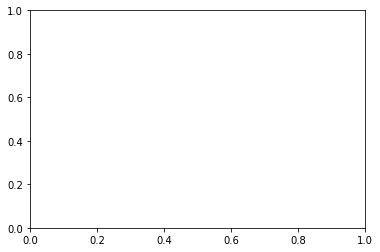

In [59]:
plt.scatter(y_test, predsL, color=['blue','green'], alpha = 1.0)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();